### IMPORTING ALL THE MODULES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

### READING THE DATASET FROM DIRECTORY

In [2]:
df=pd.read_csv(r'D:\Codsoft\Churn_Modelling.csv')

### DATA PREPROCESSING PORTION

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df['Surname']

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df=df.drop(['Surname', 'RowNumber','CustomerId'], axis=1)

In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df['Gender1']=np.where(df['Gender']=='Male',0,1)

In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df['Geography1']=np.where(df['Geography']=='France',0,np.where(df['Geography']=='Spain',1,2))

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,1


In [18]:
df1=df[['CreditScore','Geography1','Gender1','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [19]:
df1.head()

,CreditScore,Geography1,Gender1,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### CHECKING THE DATASET IS BALANCED OR NOT

0    7963
1    2037
Name: Exited, dtype: int64


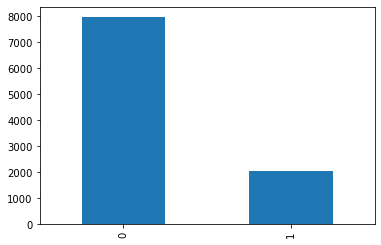

In [21]:
#NOEW LETS CHECK WHETHER THE OUTCOME COLUMN IS BALANCED
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df1["Exited"].map(lambda x: color_wheel.get(x + 1))
print(df1.Exited.value_counts())
p=df1.Exited.value_counts().plot(kind="bar")

#### FROM THE ABOVE DATASET WE CAN SEE THE DATASET IS TOTALLY UNBALANCED

In [22]:
x=df1.iloc[:,0:10]

In [23]:
x[:5]

,CreditScore,Geography1,Gender1,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


In [24]:
y=df1.iloc[:,10]

In [25]:
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [26]:
x.shape

(10000, 10)

In [27]:
y.shape

(10000,)

### BALANCING THE DATASET

In [28]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', df1.Exited.value_counts())
print('Resample dataset shape', np.unique(y_ros, return_counts=True))


Original dataset shape 0    7963
1    2037
Name: Exited, dtype: int64
Resample dataset shape (array([0, 1], dtype=int64), array([7963, 7963], dtype=int64))


In [30]:
x=x_ros
y=y_ros

### PLOTING THE DATASET AFTER BALANCING

1    7963
0    7963
Name: Exited, dtype: int64


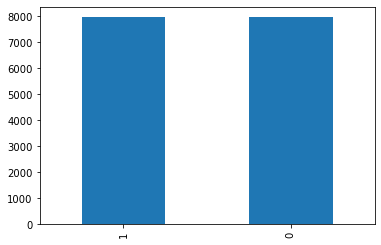

In [31]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = y.map(lambda x: color_wheel.get(x + 1))
print(y.value_counts())
p=y.value_counts().plot(kind="bar")

In [32]:
x.shape

(15926, 10)

In [33]:
y.shape

(15926,)

### DATASET STANDARISATION

In [34]:
#Standarising the dataset
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.29634086, -0.97774717,  1.02647105, ...,  0.65193397,
         1.08456336,  0.01795652],
       [-0.40876865,  0.18128531,  1.02647105, ..., -1.53389768,
         1.08456336,  0.21254446],
       [-1.49216372, -0.97774717,  1.02647105, ...,  0.65193397,
        -0.92203005,  0.23669025],
       ...,
       [-2.35070322, -0.97774717,  1.02647105, ...,  0.65193397,
         1.08456336, -0.33553027],
       [-0.02038173,  1.3403178 , -0.9742116 , ...,  0.65193397,
        -0.92203005, -0.38598925],
       [-0.85847981,  1.3403178 ,  1.02647105, ..., -1.53389768,
         1.08456336,  0.20920036]])

### SPLITING THE DATASET FROM TRAIN TEST PURPOUSE

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

### APPLYING THE ALGORITHMS

#### LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [40]:
lg_pred=lg.predict(xtest)

In [41]:
accuracy_score(ytest,lg_pred)*100

70.90395480225989

#### RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain, ytrain)
rfc_pred = rfc.predict(xtest)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,rfc_pred)*100

94.66415568110483

#### GRADIENT BOOSTING 

In [48]:


# Setting SEED for reproducibility
SEED = 23

# Importing the dataset
X, y = load_digits(return_X_y=True)

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )
# Fit to training set
gbc.fit(xtrain, ytrain)

# Predict on test set
pred_y = gbc.predict(xtest)

# accuracy
accuracy_score(ytest,pred_y)*100


79.28436911487758

### FROM THE ABOVE FOLLOWING MODEL WE CAME TO KNOW THAT RANDOM FOREST IS BEST SUITED MODEL FOR THIS DATASET